[[-0.00000000e+00  6.00000000e+00]
 [ 6.28781447e-02  5.95324845e+00]
 [ 1.08749039e-01  5.81738134e+00]
 [ 1.37177162e-01  5.60046306e+00]
 [ 1.49149718e-01  5.31213778e+00]
 [ 1.46758688e-01  4.96319042e+00]
 [ 1.32858955e-01  4.56517342e+00]
 [ 1.10733128e-01  4.13008890e+00]
 [ 8.37838520e-02  3.67011476e+00]
 [ 5.52664456e-02  3.19736354e+00]
 [ 2.80688825e-02  2.72366572e+00]
 [ 4.54190340e-03  2.26037128e+00]
 [-1.36207761e-02  1.81816638e+00]
 [-2.54541149e-02  1.40690389e+00]
 [-3.07484783e-02  1.03544829e+00]
 [-3.00355316e-02  7.11536735e-01]
 [-2.45379674e-02  4.41658404e-01]
 [-1.60881614e-02  2.30955120e-01]
 [-7.02115120e-03  8.31456498e-02]
 [-4.75410714e-05  4.76130986e-04]]


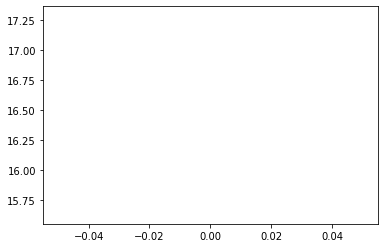

In [162]:
import numpy as np
import matplotlib.pyplot as plt
# F means force
length_b = 0.5
length_c = 3
force_c = 1

num_steps = 20
angle = np.linspace(0,3.14*0.5,num_steps)

moment_b = np.zeros(num_steps)
force_b_y1 = np.zeros(num_steps)
force_b_out_xs = np.zeros((num_steps,2))
force_b_out_ys= np.zeros((num_steps,2))

point_b_init = np.array([0.5,0])
point_b_out_init = np.array([0.5,-0.25])
point_d = np.array([0.5, -2])

rotation = np.zeros((2,2))
for i, alpha in enumerate(angle):
    moment_b[i] = force_c * np.cos (alpha) * length_c
    force_b_y1[i] = moment_b[i] / length_b

    rotation[0,0] = np.cos(alpha)
    rotation[0,1] = -np.sin(alpha)
    rotation[1,0] = np.sin(alpha)
    rotation[1,1] = np.cos(alpha)
    
    point_b = rotation.dot(point_b_init)
    point_b_out = rotation.dot(point_b_out_init)
                           
    vector_db = point_d - point_b_out
    
    dv_unit = vector_db / np.linalg.norm(vector_db)
    perpendicular_dv_unit = np.array([-dv_unit[1], dv_unit[0]])
    force_b = force_b_y1[i] * ((point_b-point_b_out) / np.linalg.norm(point_b-point_b_out))
    force_b_out_xs[i] = np.dot(force_b, dv_unit) * dv_unit
    force_b_out_ys[i] = np.dot(force_b, perpendicular_dv_unit) * perpendicular_dv_unit

plt.plot(np.linalg.norm(force_b_out_xs))
print(force_b_out_xs)

SyntaxError: unexpected EOF while parsing (<ipython-input-157-5b9690161ab6>, line 1)